In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from np_fun import prob, prob_part
from tf_fun import init as tf_init


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#### def prob(*x,phi=0.1,alp = 0.125):
#%timeit prob_part(0,0,0,0,1)    


In [4]:
def func(x):
    return prob_part(0,0,0,0,phi=x)

0.00025017901502719797


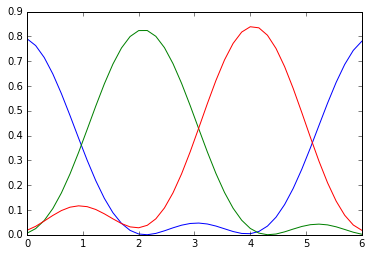

In [5]:
x = np.linspace(0,6,40)
y = np.array(list(map(lambda x: abs(np.power(func(x),2)),x)))
for i in y.T:
    plt.plot(x,i)
print(np.min(y))


In [37]:
tst = lambda x,y,z: (x-4)**2+1+y*x+np.sin(z)
f = lambda a,b: lambda x: tst(x,a,b)
x_points = np.linspace(0,2,25)
vals = np.array(list(map(f(3.1,2.1),x_points)))

v = tf.Variable(vals)
params = tf.Variable(np.ones(2))


vc = np.array([tst(i,params[0],params[1]) for i in x_points])
d = [v - i for i in vc]
loss = tf.reduce_mean(tf.square(d))

opt = tf.train.AdamOptimizer(learning_rate=0.09)
opt_op = opt.minimize(loss, var_list=[params])
grads_and_vars = opt.compute_gradients(loss, var_list=[params])

xrt = [0,0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        ret = sess.run(opt_op)
        xrt,lrt,g_v = sess.run([params,loss,grads_and_vars])
        print(i,ret,xrt,lrt,g_v)
    
        
v_r = list(map(f(*xrt),x_points))
print(len(v_r),len(x_points))
plt.figure(figsize=(10,10))
plt.plot(x_points,list(v_r))
plt.plot(x_points,vals)
    

AttributeError: 'Tensor' object has no attribute 'sin'

In [31]:
expi = lambda x: tf.exp(tf.complex(0.,x))
real = lambda x: tf.complex(x,0.)
tf.reset_default_graph()

t = real(tf.sqrt(0.2))
r = real(tf.sqrt(1.-0.2))

pi = np.pi
def a12(al= np.pi, thet=0):
    return expi(thet)*\
    tf.Variable(
        [
        [ expi(-thet), 0, 0],
        [0, t, r*expi(al)  ],
        [0, -r*expi(-al), t]
        ]
    )

vals = [0.125,0,pi,0,pi,pi,pi,0,0,0,0,0]
vals = [tf.constant(float(x),dtype=tf.float32) for x in vals]
a1,al1,al2,al3,al4,ala,alb,th1,th2,th3,th4,thb = vals
 f = a12(al4,th4)
fun = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    fun = sess.run(f)
    print(fun)

[[ 1.       -0.000000e+00j  0.       +0.000000e+00j
   0.       +0.000000e+00j]
 [ 0.       +0.000000e+00j  0.4472136+0.000000e+00j
  -0.8944272-7.819331e-08j]
 [ 0.       +0.000000e+00j  0.8944272-7.819331e-08j
   0.4472136+0.000000e+00j]]


In [20]:
T=0.6
t = np.sqrt(T)
r = np.sqrt(1.-T)
def a12(al=np.pi, thet=0):
    return np.exp(1j*thet)*\
    np.array(
    [
    [np.exp(-1j*thet), 0, 0],
    [0, t, r*np.exp(1j*al)],
    [0, -r*np.exp(-1j*al), t]
    ]
    )

def a01(al=np.pi, thet=0):
    return np.exp(1j*thet)*\
    np.array(
    [
        [t, r*np.exp(1j*al), 0],
        [-r*np.exp(-1j*al), t, 0],
        [0, 0, np.exp(-1j*thet)]
    ]
    )

print(a01(1.2,2))
print(np.array(fun))


[[-0.32234595+0.70433876j -0.63137705-0.03691905j -0.        +0.j        ]
 [-0.44063601-0.45369583j -0.32234595+0.70433876j -0.        +0.j        ]
 [-0.        +0.j         -0.        +0.j          1.        +0.j        ]]
<function <lambda> at 0x7fc2f14d7510>


In [33]:
tf.reset_default_graph()

tf_prob = tf_init()
def func(x):
    return tf_prob(0,0,0,0,phi=x)
pts = np.linspace(0,6,20)
y = np.array(list(map(lambda x: abs(np.power(func(x),2)),x)))
vals =tf.Variable([func(tf.Variable(x,dtype=tf.float32)) for x in pts])
#mods = tf.map_fn(tf.abs(tf.square,vals))


foo = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    fun = sess.run(vals)
    foo = fun
    print(fun.shape)

(20, 3, 1)


(20, 3, 1)


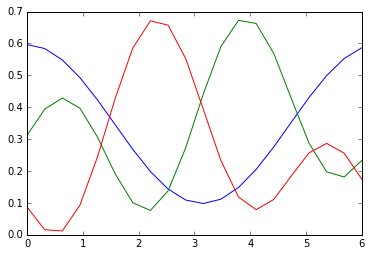

In [34]:
tf_vars = np.array(foo)
print(tf_vars.shape)
tf_vars = tf_vars.reshape(20,3)
pts = np.linspace(0,6,20)
y = np.array([abs(np.power(x,2)) for x in tf_vars])
%matplotlib inline
for i in y.T:
    plt.plot(pts,i)

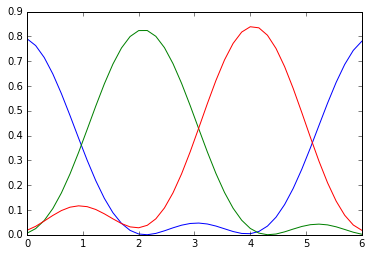

In [43]:

def func(x):
    return prob_part(0,0,0,0,phi=x)
x = np.linspace(0,6,40)
y = np.array(list(map(lambda x: abs(np.power(func(x),2)),x)))
for i in y.T:
    plt.plot(x,i)

In [36]:
y_tf = np.array([abs(np.power(x,2)) for x in tf_vars])
print(y[0],y_tf[0])
print(y[0] - y_tf[0])

[0.61069894 0.14746056 0.23920183] [0.59651417 0.31223613 0.08683799]
[ 0.01418477 -0.16477557  0.15236384]


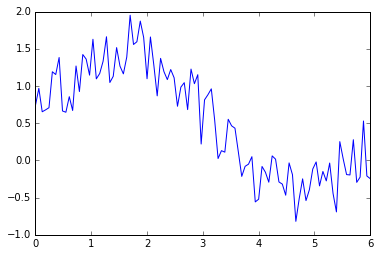

In [20]:
x = np.linspace(0,6,100)
data = np.sin(x)+np.random.rand(100)
plt.plot(x,data)



In [15]:
fun = lambda x,y: tf.sin(x*y)
N = 100
vals= tf.placeholder(shape=(N),dtype=tf.float32)
pts= tf.placeholder(shape=(N),dtype=tf.float32)
w = tf.Variable(0.4)
loss = tf.reduce_sum(tf.square(vals-fun(w,pts)))
opt = tf.train.GradientDescentOptimizer(learning_rate=0.04)
step= opt.minimize(loss,var_list=[w])

with tf.Session() as sess:
    print(loss_r)
    sess.run(tf.global_variables_initializer())
    for i in range(10):
        _,loss_r,w_r = sess.run([step,loss,w],feed_dict={vals:data,pts:x})
        print('loss:%f, w:%f'%(loss_r,w_r))


136.46384
loss:90.294121, w:0.400000
loss:132.499954, w:8.231040
loss:130.661438, w:7.537200
loss:133.707413, w:8.358198
loss:132.743118, w:8.245891
loss:128.822830, w:7.629921
loss:133.763535, w:8.408216
loss:133.757324, w:8.419720
loss:133.715454, w:8.451012
loss:133.514297, w:8.524213
